In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests, json

from sklearn.metrics import *
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import *
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# 크롤링
from bs4 import BeautifulSoup
import openpyxl

# Linear, Logistic
from sklearn.linear_model import LinearRegression, LogisticRegression

# knn
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

# decision
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

# svm
from sklearn.svm import SVC, SVR

# bagging
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

# boosting
from xgboost import XGBClassifier, XGBRegressor

In [165]:
test = pd.read_csv('test_dataset_v01.csv')
test.shape

(2441, 24)

In [166]:
test.loc[test['url_domain_len'].isna(), 'url_domain_len'] = test['url_hostname_len']

In [167]:
drop_col = ['url_chinese_present', "html_num_tags('applet')", 'Unnamed: 0', 'url_hostname_len']
test = test.drop(drop_col, axis=1)

In [168]:
test.isna().sum()

url_len                      0
url_num_hyphens_dom          0
url_path_len               466
url_domain_len             101
url_num_dots                 0
url_num_underscores          0
url_query_len                0
url_num_query_para           0
url_ip_present               0
url_entropy                  0
url_port                     0
html_num_tags('iframe')      0
html_num_tags('script')    467
html_num_tags('embed')       0
html_num_tags('object')      0
html_num_tags('div')         0
html_num_tags('head')        0
html_num_tags('body')        0
html_num_tags('form')      467
html_num_tags('a')         461
dtype: int64

In [154]:
test["html_num_tags('form')"] = test["html_num_tags('form')"].fillna(1)

In [153]:
test['url_domain_len'] = test['url_domain_len'].fillna(29)

In [99]:
test["html_num_tags('a')"] = test["html_num_tags('a')"].fillna(test["html_num_tags('a')"].mean())

In [100]:
test['url_path_len'] = test['url_path_len'].fillna(test['url_path_len'].mean())

In [101]:
test["html_num_tags('script')"] = test["html_num_tags('script')"].fillna(test["html_num_tags('script')"].mean())

In [10]:
test.to_csv('test_val_2.csv', index=False)

In [42]:
import scipy.stats as spst

In [47]:
def plt_spst(x_, y_):
    sns.regplot(data=test, x=x_, y=y_)
    plt.show()
    # result = spst.pearsonr(test[x_], test[y_])
    # print(result)

In [109]:
test["html_num_tags('body')"].unique()

array([1, 3, 0, 2], dtype=int64)

In [171]:
test.loc[(test['url_query_len'] == 0) & (test['url_num_query_para'] == 0) & test["url_path_len"].isna()]
test.loc[(test['url_query_len'] == 0) & test["url_path_len"].isna()]
# test.loc[(test['url_query_len'] == 0) & test["url_path_len"].isna(), 'url_path_len'] = 33

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,url_entropy,url_port,html_num_tags('iframe'),html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a')
2,44,0,NaN,20.0,3,3,0,0,0,4.612835,0,0,6.0,3,3,34,1,1,0.0,136.0
4,43,2,NaN,26.0,2,0,0,0,0,4.240669,0,0,NaN,0,0,41,1,1,NaN,NaN
19,45,1,NaN,12.0,4,0,0,0,0,4.556021,0,0,0.0,0,0,0,1,1,NaN,NaN
21,22,1,NaN,NaN,2,0,0,0,0,3.909368,0,1,5.0,0,0,28,1,1,0.0,31.0
26,33,0,NaN,17.0,4,0,0,0,0,3.996439,0,0,12.0,0,0,37,1,1,0.0,79.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2431,25,1,NaN,24.0,2,0,0,0,0,4.226410,0,0,0.0,0,0,2,1,1,1.0,0.0
2433,45,2,NaN,45.0,2,0,0,0,0,4.051428,0,0,1.0,0,0,72,1,1,0.0,20.0
2435,45,3,NaN,35.0,3,0,0,0,0,4.314829,0,0,2.0,0,0,41,1,1,1.0,18.0
2436,63,0,NaN,17.0,4,2,0,0,0,4.738082,0,1,18.0,0,0,79,1,1,1.0,119.0


In [146]:
test['url_path_len'] = test['url_path_len'].fillna(27)

In [147]:
test.loc[(test['url_query_len'] == 0) & test["html_num_tags('script')"].isna()]
test.loc[(test['url_query_len'] == 0) & test["html_num_tags('script')"].isna(), "html_num_tags('script')"] = 17

In [148]:
test["html_num_tags('script')"] = test["html_num_tags('script')"].fillna(7)

In [149]:
test.loc[(test['url_query_len'] == 0) & test["html_num_tags('a')"].isna()]
test.loc[(test['url_query_len'] == 0) & test["html_num_tags('a')"].isna(), "html_num_tags('a')"] = 100

In [150]:
test["html_num_tags('a')"] = test["html_num_tags('a')"].fillna(18)

In [122]:
test.loc[(test['url_domain_len'] == 0) & test["url_domain_len"].isna()]
# test.loc[(test['url_domain_len'] == 0) & test["url_domain_len"].isna(), "url_domain_len"] = 100

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,url_entropy,url_port,html_num_tags('iframe'),html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a')


In [151]:
test.loc[(test['url_query_len'] == 0) & test["html_num_tags('form')"].isna()]
test.loc[(test['url_query_len'] == 0) & test["html_num_tags('form')"].isna(), "html_num_tags('form')"] = 2

In [ ]:
test.loc[(test['url_num_hyphens_dom'] <= 1) & (test["html_num_tags('div')"] >= 60) & test["url_path_len"].isna()]
test.loc[(test['url_num_hyphens_dom'] >= 1) & (test["html_num_tags('div')"] <= 50) & test["url_path_len"].isna()]
test.loc[(test['url_num_hyphens_dom'] <= 1) & (test["html_num_tags('div')"] >= 60) & test["html_num_tags('script')"].isna()]
test.loc[(test['url_num_hyphens_dom'] >= 1) & (test["html_num_tags('div')"] <= 50) & test["html_num_tags('script')"].isna()]
test.loc[(test['url_num_hyphens_dom'] <= 1) & (test["html_num_tags('div')"] >= 60) & test["html_num_tags('a')"].isna()]
test.loc[(test['url_num_hyphens_dom'] >= 1) & (test["html_num_tags('div')"] <= 50) & test["html_num_tags('a')"].isna()]

In [81]:
test.loc[(test['url_num_hyphens_dom'] <= 1) & (test["html_num_tags('div')"] >= 60) & test["url_path_len"].isna()]
test.loc[(test['url_num_hyphens_dom'] <= 1) & (test["html_num_tags('div')"] >= 60) & test["url_path_len"].isna(), "url_path_len"] = 37

In [82]:
test.loc[(test['url_num_hyphens_dom'] >= 1) & (test["html_num_tags('div')"] <= 50) & test["url_path_len"].isna()]
test.loc[(test['url_num_hyphens_dom'] >= 1) & (test["html_num_tags('div')"] <= 50) & test["url_path_len"].isna(), "url_path_len"] = 21

In [91]:
test.loc[(test['url_num_hyphens_dom'] <= 1) & (test["html_num_tags('div')"] >= 60) & test["url_domain_len"].isna()]
test.loc[(test['url_num_hyphens_dom'] <= 1) & (test["html_num_tags('div')"] >= 60) & test["url_domain_len"].isna(), "url_domain_len"] = 18

In [92]:
test.loc[(test['url_num_hyphens_dom'] >= 1) & (test["html_num_tags('div')"] <= 50) & test["url_domain_len"].isna()]
test.loc[(test['url_num_hyphens_dom'] >= 1) & (test["html_num_tags('div')"] <= 50) & test["url_domain_len"].isna(), "url_domain_len"] = 29

In [93]:
test.loc[(test['url_num_hyphens_dom'] <= 1) & (test["html_num_tags('div')"] >= 60) & test["html_num_tags('script')"].isna()]
test.loc[(test['url_num_hyphens_dom'] <= 1) & (test["html_num_tags('div')"] >= 60) & test["html_num_tags('script')"].isna(), "html_num_tags('script')"] = 17

In [94]:
test.loc[(test['url_num_hyphens_dom'] >= 1) & (test["html_num_tags('div')"] <= 50) & test["html_num_tags('script')"].isna()]
test.loc[(test['url_num_hyphens_dom'] >= 1) & (test["html_num_tags('div')"] <= 50) & test["html_num_tags('script')"].isna(), "html_num_tags('script')"] = 7

In [95]:
test.loc[(test['url_num_hyphens_dom'] <= 1) & (test["html_num_tags('div')"] >= 60) & test["html_num_tags('a')"].isna()]
test.loc[(test['url_num_hyphens_dom'] <= 1) & (test["html_num_tags('div')"] >= 60) & test["html_num_tags('a')"].isna(), "html_num_tags('a')"] = 100

In [96]:
test.loc[(test['url_num_hyphens_dom'] <= 1) & (test["html_num_tags('div')"] <= 50) & test["html_num_tags('a')"].isna()]
test.loc[(test['url_num_hyphens_dom'] <= 1) & (test["html_num_tags('div')"] <= 50) & test["html_num_tags('a')"].isna(), "html_num_tags('a')"] = 23

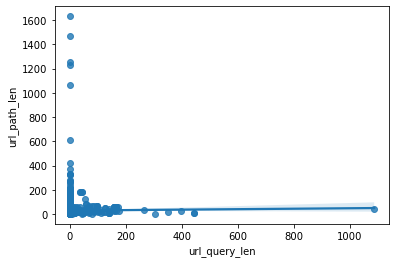

In [163]:
# 노선, 정류장 상관관계
sns.regplot(data=test, x='url_query_len', y="url_path_len")
plt.show()

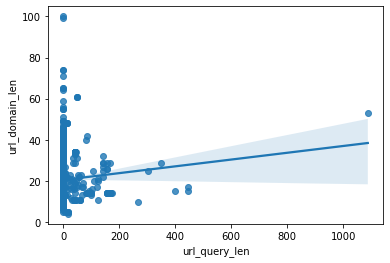

In [162]:
# 노선, 정류장 상관관계
sns.regplot(data=test, x='url_query_len', y="url_domain_len")
plt.show()

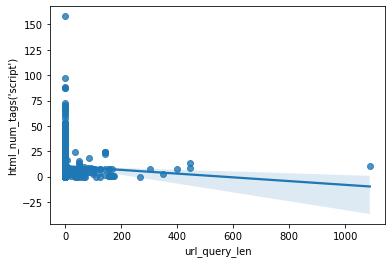

In [164]:
# 노선, 정류장 상관관계
sns.regplot(data=test, x='url_query_len', y="html_num_tags('script')")
plt.show()

In [155]:
test.isna().sum()

url_len                    0
url_num_hyphens_dom        0
url_path_len               0
url_domain_len             0
url_num_dots               0
url_num_underscores        0
url_query_len              0
url_num_query_para         0
url_ip_present             0
url_entropy                0
url_port                   0
html_num_tags('iframe')    0
html_num_tags('script')    0
html_num_tags('embed')     0
html_num_tags('object')    0
html_num_tags('div')       0
html_num_tags('head')      0
html_num_tags('body')      0
html_num_tags('form')      0
html_num_tags('a')         0
dtype: int64

In [137]:
test["html_num_tags('form')"].unique()

array([ 1., nan,  0.,  3.,  4.,  2.,  5., 12., 19.,  6.,  7.])

In [136]:
test.shape

(2441, 24)

In [138]:
test.groupby(by="html_num_tags('form')")['Unnamed: 0'].count()

html_num_tags('form')
0.0     643
1.0     979
2.0     222
3.0      68
4.0      24
5.0      19
6.0       3
7.0      12
12.0      1
19.0      3
Name: Unnamed: 0, dtype: int64

In [156]:
test.to_csv('test_val_4.csv', index=False)

In [172]:
data = pd.read_csv('train_dataset.csv')

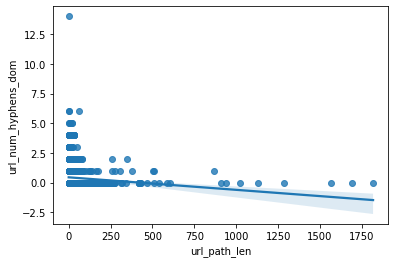

In [174]:
# 노선, 정류장 상관관계
sns.regplot(data=data, y='url_num_hyphens_dom', x="url_path_len")
plt.show()